## Ejercicio 1

In [7]:
import numpy as np

# funcion objetivo para la maximización
def funcion_objetivo(x):
    return np.sin(x) + np.sin(x**2)

# parámetros
num_particulas = 2  # número de partículas
dim = 1  # una dimensión (solo x)
cantidad_iteraciones = 30  # máximo número de iteraciones
c1 = 1.49  # componente cognitivo
c2 = 1.49  # componente social
w = 0.5  # factor de inercia
limite_inf = 0  # límite inferior de búsqueda
limite_sup = 10  # límite superior de búsqueda

# inicialización
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las partículas
velocidades = np.zeros((num_particulas, dim))  # inicialización de la matriz de velocidades en cero

# inicialización de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales
fitness_pbest = np.array([funcion_objetivo(p) for p in particulas])  # mejores fitness personales iniciales
gbest = pbest[np.argmax(fitness_pbest)]  # mejor posición global inicial
fitness_gbest = np.max(fitness_pbest)  # fitness global inicial

# Lista para almacenar los valores de gbest en cada iteración
historial_gbest = []

# Bucle de búsqueda (modificado para guardar gbest en cada iteración)
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iterar sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generación de dos números aleatorios

        # Actualización de la velocidad de la partícula
        velocidades[i] = (w * velocidades[i] + 
                          c1 * r1 * (pbest[i] - particulas[i]) + 
                          c2 * r2 * (gbest - particulas[i]))

        # Actualización de la posición de la partícula
        particulas[i] += velocidades[i]

        # Mantener las partículas dentro de los límites
        particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)

        # Evaluar la función objetivo
        fitness = funcion_objetivo(particulas[i])

        # Actualización del mejor personal
        if fitness > fitness_pbest[i]:
            fitness_pbest[i] = fitness  # Actualizar el mejor fitness personal
            pbest[i] = particulas[i].copy()  # Actualizar la mejor posición personal

            # Actualización del mejor global
            if fitness > fitness_gbest:
                fitness_gbest = fitness  # Actualizar el mejor fitness global
                gbest = particulas[i].copy()  # Actualizar la mejor posición global

    # Almacenar el mejor global encontrado en esta iteración
    historial_gbest.append(fitness_gbest)

    # Imprimir el mejor global en cada iteración
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest[0]}, Valor {fitness_gbest}")

# resultado
solucion_optima = gbest[0]  # mejor posición global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("\nSolución óptima (x):", solucion_optima)
print("Valor óptimo:", valor_optimo)


Iteración 1: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 2: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 3: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 4: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 5: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 6: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 7: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 8: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 9: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 10: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 11: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 12: Mejor posición global 7.680864919179776, Valor 1.6251112712660367
Iteración 13: Mejor posición global 7.68086491917

Luego de reiteradas iteraciones, se obtienen dos posibles soluciones óptimas: 1.29 y 8.04

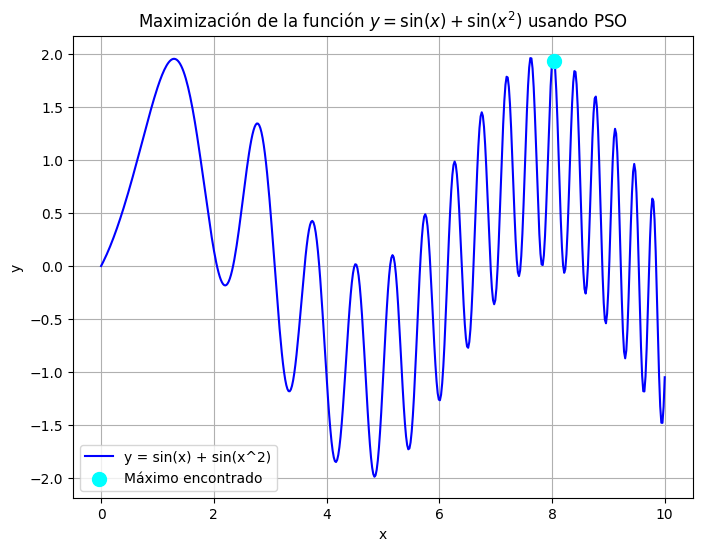

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo para graficar
def funcion_objetivo(x):
    return np.sin(x) + np.sin(x**2)

# Parámetros obtenidos del PSO
solucion_optima = gbest[0]  # Mejor posición global encontrada por el PSO
valor_optimo = fitness_gbest  # Mejor valor de la función objetivo encontrado

# Rango de valores de x para graficar la función
x_vals = np.linspace(0, 10, 500)
y_vals = funcion_objetivo(x_vals)

# Graficar la función objetivo
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="y = sin(x) + sin(x^2)", color="blue")

# Marcar el punto donde se encontró el máximo
plt.scatter(solucion_optima, valor_optimo, color="cyan", s=100, zorder=5, label="Máximo encontrado")

# Agregar etiquetas y leyenda
plt.title("Maximización de la función $y = \sin(x) + \sin(x^2)$ usando PSO")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

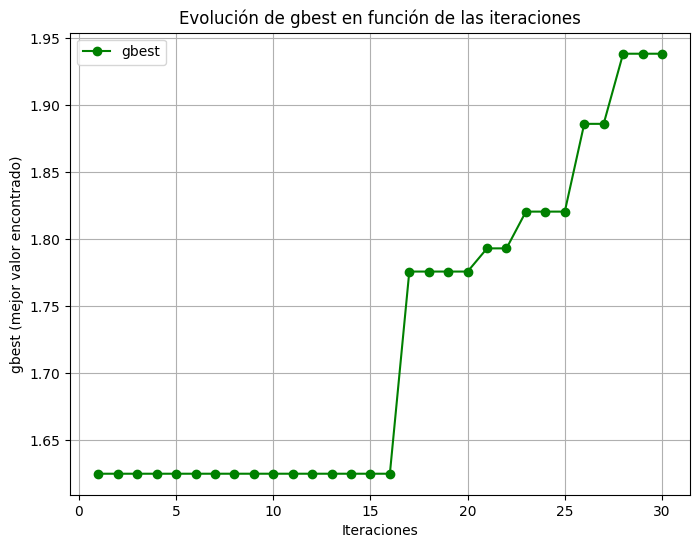

In [10]:
# Adaptar el tipo de dato de historial_gbest para poder graficarlo
historial_gbest = [x.item() if isinstance(x, np.ndarray) else x for x in historial_gbest]
historial_gbest = np.array(historial_gbest)

# Graficar la evolución de gbest a lo largo de las iteraciones
plt.figure(figsize=(8, 6))
plt.plot(range(1, cantidad_iteraciones + 1), historial_gbest, marker="o", color="green", label="gbest")

# Agregar etiquetas y leyenda
plt.title("Evolución de gbest en función de las iteraciones")
plt.xlabel("Iteraciones")
plt.ylabel("gbest (mejor valor encontrado)")
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Estabilidad inicial: Durante las primeras iteraciones, el valor de gbest se mantiene constante, lo que indica que el algoritmo inicialmente no encontró una mejor solución o se quedó en un óptimo local durante este período. Luego de un determinado número de iteraciones, se observa un pequeño salto en gbest, lo que sugiere que el algoritmo encontró una solución mejor en esta etapa. Finalmente, los valores de gbest se estabilizan muy cerca de 1.95 Esto sugiere que el algoritmo se acercó a una solución óptima o se estancó en un valor cercano al máximo.

El algoritmo PSO mostró ser efectivo para encontrar un valor máximo de la función objetivo dentro del rango dado. Aunque inicialmente el algoritmo tuvo dificultades para mejorar su solución, eventualmente pudo escapar de un óptimo local y mejorar el valor de gbest.<br>

El hecho de que gbest haya permanecido constante durante las primeras iteraciones puede indicar que la exploración del espacio de búsqueda fue limitada en las etapas iniciales. Esto podría mejorarse ajustando los parámetros como el peso de inercia o los coeficientes de aceleración para fomentar una mayor exploración al principio del proceso.<br>

Es posible que el PSO no haya encontrado el máximo global exacto, pero está cerca. Con un mayor número de iteraciones o ajustes en los parámetros, es probable que se pudiera obtener un valor aún mayor.

## Ejercicio 2

Valores simulados: a = 38.70, b = -17.93
Iteración 1: Mejor posición global [37.23991741 20.73877826], Valor 10.013174264372163
Iteración 2: Mejor posición global [37.23991741 20.73877826], Valor 10.013174264372163
Iteración 3: Mejor posición global [37.23991741 20.73877826], Valor 10.013174264372163
Iteración 4: Mejor posición global [37.23991741 20.73877826], Valor 10.013174264372163
Iteración 5: Mejor posición global [37.94849538 15.03342998], Valor 8.942833734161738
Iteración 6: Mejor posición global [37.94849538 15.03342998], Valor 8.942833734161738
Iteración 7: Mejor posición global [37.94849538 15.03342998], Valor 8.942833734161738
Iteración 8: Mejor posición global [37.94849538 15.03342998], Valor 8.942833734161738
Iteración 9: Mejor posición global [37.53614562 18.9849948 ], Valor 2.4590988700951657
Iteración 10: Mejor posición global [37.53614562 18.9849948 ], Valor 2.4590988700951657

Solución óptima (x, y): [37.53614562 18.9849948 ]
Valor óptimo: 2.4590988700951657


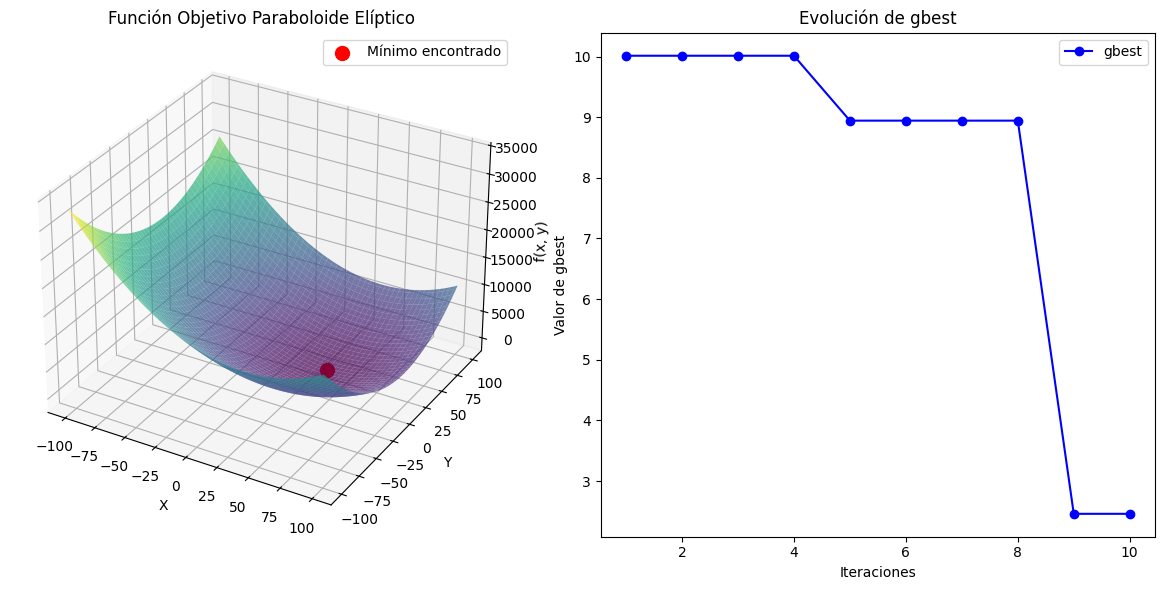

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función objetivo paraboloide elíptico
def funcion_objetivo(x, y, a, b):
    return (x - a) ** 2 + (y + b) ** 2

# Parámetros del PSO
num_particulas = 20  # Número de partículas
dim = 2  # Dimensiones
cantidad_iteraciones = 10  # Máximo número de iteraciones
c1 = 2.0  # Componente cognitivo
c2 = 2.0  # Componente social
w1 = 0.7  # Factor de inercia
limite_inf = -100  # Límite inferior de búsqueda
limite_sup = 100  # Límite superior de búsqueda

# Se pueden ingresar los valores de a y b mediante
#a = float(input("Ingrese el valor de a (entre -50 y 50): "))
#b = float(input("Ingrese el valor de b (entre -50 y 50): "))

# Simulación del ingreso de los valores de a y b
a = np.random.uniform(-50, 50)  # Valor aleatorio de a entre -50 y 50
b = np.random.uniform(-50, 50)  # Valor aleatorio de b entre -50 y 50

print(f"Valores simulados: a = {a:.2f}, b = {b:.2f}")

def minimizacion_PSO(w : float):
    # Inicialización de las partículas
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # Posiciones iniciales de las partículas
    velocidades = np.zeros((num_particulas, dim))  # Inicialización de la matriz de velocidades en cero

    # Inicialización de pbest y gbest
    pbest = particulas.copy()  # Mejores posiciones personales iniciales
    fitness_pbest = np.empty(num_particulas)  # Mejores fitness personales iniciales
    for i in range(num_particulas):
        fitness_pbest[i] = funcion_objetivo(particulas[i][0], particulas[i][1], a, b)

    gbest = pbest[np.argmin(fitness_pbest)]  # Mejor posición global inicial
    fitness_gbest = np.min(fitness_pbest)  # Fitness global inicial

    # Lista para almacenar los valores de gbest en cada iteración
    historial_gbest = []

    # Búsqueda
    for iteracion in range(cantidad_iteraciones):
        for i in range(num_particulas):  # Iteración sobre cada partícula
            r1, r2 = np.random.rand(), np.random.rand()  # Generación de dos números aleatorios

            # Actualización de la velocidad de la partícula en cada dimensión
            for d in range(dim):
                velocidades[i][d] = (w * velocidades[i][d] +
                                    c1 * r1 * (pbest[i][d] - particulas[i][d]) +
                                    c2 * r2 * (gbest[d] - particulas[i][d]))

            # Actualización de la posición de la partícula en cada dimensión
            particulas[i] = particulas[i] + velocidades[i]
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)  # Mantener partículas dentro de los límites

            # Evaluación de la función objetivo para la nueva posición
            fitness = funcion_objetivo(particulas[i][0], particulas[i][1], a, b)

            # Actualización del mejor personal
            if fitness < fitness_pbest[i]:
                fitness_pbest[i] = fitness  # Actualización del mejor fitness personal
                pbest[i] = particulas[i].copy()  # Actualización de la mejor posición personal

                # Actualización del mejor global
                if fitness < fitness_gbest:
                    fitness_gbest = fitness  # Actualización del mejor fitness global
                    gbest = particulas[i].copy()  # Actualización de la mejor posición global

        # Almacenar el mejor valor global de esta iteración
        historial_gbest.append(fitness_gbest)

        # Imprimir el mejor global en cada iteración
        print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

    # Resultado final
    solucion_optima = gbest  # Mejor posición global final
    valor_optimo = fitness_gbest  # Mejor fitness global final

    return solucion_optima, valor_optimo, historial_gbest

solucion_optima, valor_optimo, historial_gbest = minimizacion_PSO(w1)

print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

# Graficar la función objetivo y la solución óptima
x_vals = np.linspace(limite_inf, limite_sup, 100)
y_vals = np.linspace(limite_inf, limite_sup, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_objetivo(X, Y, a, b)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico 3D de la función objetivo
ax1 = fig.add_subplot(121, projection='3d')

# Graficar la superficie
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Agregar el punto mínimo encontrado
ax1.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='r', s=100, label="Mínimo encontrado")

# Etiquetas y título
ax1.set_title("Función Objetivo Paraboloide Elíptico")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(x, y)")
ax1.legend()

# Subplot 2: Gráfico de línea de gbest en función de las iteraciones
ax2 = fig.add_subplot(122)

# Graficar la evolución de gbest
ax2.plot(range(1, cantidad_iteraciones + 1), historial_gbest, marker='o', color='b', label="gbest")

# Etiquetas y título
ax2.set_title("Evolución de gbest")
ax2.set_xlabel("Iteraciones")
ax2.set_ylabel("Valor de gbest")
ax2.legend()

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()


Iteración 1: Mejor posición global [48.42895071 17.46626196], Valor 94.9539187501769
Iteración 2: Mejor posición global [39.80260528 18.45269651], Valor 1.4998167029128844
Iteración 3: Mejor posición global [39.27418831 18.00958911], Valor 0.34134130314093913
Iteración 4: Mejor posición global [38.83228675 17.63925683], Valor 0.10270347326105142
Iteración 5: Mejor posición global [38.8242602  17.80533193], Valor 0.03188831063481727
Iteración 6: Mejor posición global [38.78820861 17.83096294], Valor 0.018218639560396835
Iteración 7: Mejor posición global [38.70458683 17.91363692], Valor 0.0003207499865202667
Iteración 8: Mejor posición global [38.69941126 17.92796931], Valor 1.6394191667373104e-05
Iteración 9: Mejor posición global [38.69857108 17.92928409], Valor 9.364531339396225e-06
Iteración 10: Mejor posición global [38.69781907 17.93084406], Valor 8.406717020785846e-06


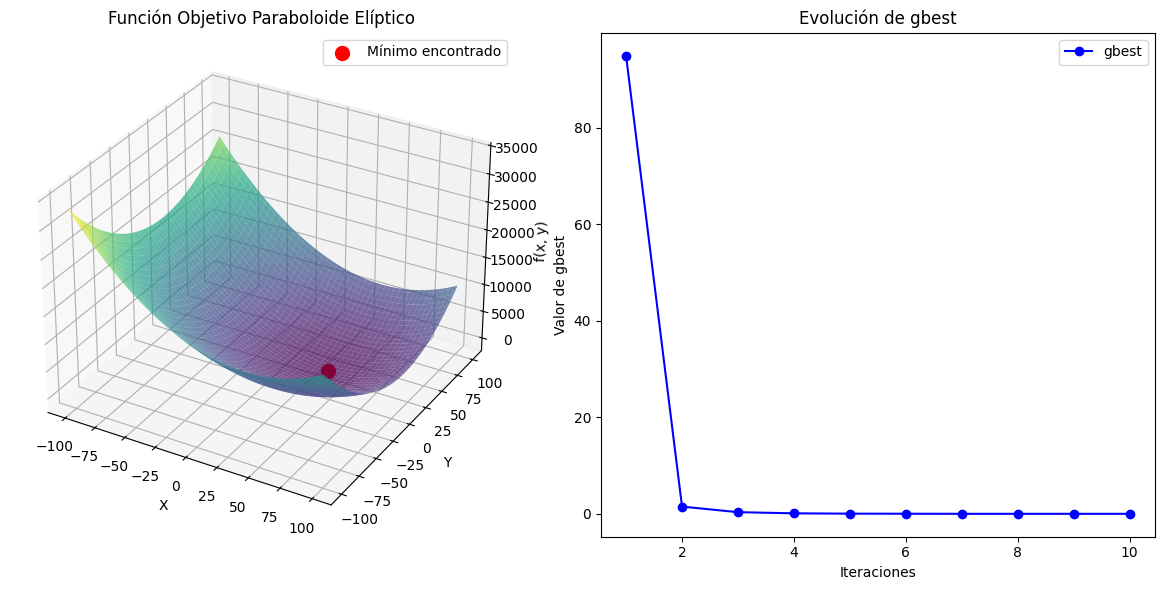

In [23]:
w2 = 0
solucion_optima, valor_optimo, historial_gbest = minimizacion_PSO(w2)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico 3D de la función objetivo
ax1 = fig.add_subplot(121, projection='3d')

# Graficar la superficie
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Agregar el punto mínimo encontrado
ax1.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='r', s=100, label="Mínimo encontrado")

# Etiquetas y título
ax1.set_title("Función Objetivo Paraboloide Elíptico")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(x, y)")
ax1.legend()

# Subplot 2: Gráfico de línea de gbest en función de las iteraciones
ax2 = fig.add_subplot(122)

# Graficar la evolución de gbest
ax2.plot(range(1, cantidad_iteraciones + 1), historial_gbest, marker='o', color='b', label="gbest")

# Etiquetas y título
ax2.set_title("Evolución de gbest")
ax2.set_xlabel("Iteraciones")
ax2.set_ylabel("Valor de gbest")
ax2.legend()

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()

In [27]:
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)


Solución óptima (x, y): [38.69781907 17.93084406]
Valor óptimo: 8.406717020785846e-06


Con w=0.7:

El coeficiente de inercia positivo (0.7) le permite a las partículas mantener parte de su velocidad anterior, favoreciendo que las partículas exploren más ampliamente el espacio de búsqueda al principio. Esto significa que las partículas tienen más tendencia a moverse en la misma dirección en la que venían y cubrir más terreno, lo que es ideal en las etapas iniciales del algoritmo.

En los primeros pasos, se observa que el valor de la mejor posición global no mejora significativamente. Esto sugiere que el algoritmo está explorando el espacio de soluciones.

A medida que avanza el número de iteraciones, la solución mejora, lo que indica que el algoritmo eventualmente converge hacia una buena solución. La búsqueda global permite al PSO evitar caer en mínimos locales demasiado pronto.

La convergencia es más lenta porque el algoritmo mantiene una fase de exploración durante más iteraciones, lo que permite una búsqueda más completa del espacio de soluciones. Aunque el progreso hacia el mínimo global es más gradual, esto puede ser beneficioso en problemas con muchos mínimos locales.
En este caso, la solución final obtenida es aceptable pero no tan preciso como con w=0.

Con w=0:

Con un coeficiente de inercia w=0, el término de velocidad anterior desaparece, y las partículas dependen exclusivamente de los términos cognitivo y social. Esto significa que el algoritmo explota más rápidamente las mejores posiciones ya encontradas, lo que puede llevar a una convergencia más rápida.

En este caso, se observa una mejora significativa desde la primera iteración hasta la segunda iteración, donde el valor óptimo ya es mucho mejor. La optimización sigue progresando rápidamente hasta alcanzar un valor muy cercano al óptimo real con una precisión extremadamente alta.
Aunque la explotación rápida puede ser beneficiosa para encontrar buenos resultados en menos iteraciones, existe el riesgo de que el algoritmo caiga en mínimos locales si el espacio de búsqueda es más complejo.

La convergencia es más rápida porque las partículas tienden a moverse hacia las mejores posiciones conocidas de manera más agresiva. El valor de gbest mejora rápidamente, y el algoritmo converge a una solución con una precisión muy alta ya desde las primeras iteraciones.

Sin embargo, si el problema fuera más complejo con más mínimos locales, este comportamiento podría llevar al algoritmo a converger prematuramente en un mínimo local sin explorar adecuadamente otras regiones del espacio de búsqueda.

Conclusiones generales:

Coeficiente de inercia mayor (w=0.7):

Favorece una mejor exploración global al permitir que las partículas mantengan parte de su movimiento previo, lo que puede ayudar a evitar convergencias prematuras en mínimos locales.
Es más adecuado para problemas complejos donde es necesario un equilibrio entre exploración y explotación.

Coeficiente de inercia bajo o nulo (w=0):

Favorece una rápida convergencia hacia soluciones ya exploradas, explotando agresivamente las mejores posiciones conocidas. Esto puede ser útil en problemas simples o bien estructurados.
Sin embargo, en problemas más difíciles o con muchos mínimos locales, un coeficiente de inercia nulo podría llevar a una convergencia demasiado rápida, aumentando el riesgo de caer en mínimos locales sin explorar otras áreas del espacio de búsqueda.

Algoritmo PSO con Pyswarm:

Valores simulados: a = 39.52, b = -19.52
No constraints given.
Best after iteration 1: [47.07759798 17.62548789] 60.62513986042821
Best after iteration 2: [47.07759798 17.62548789] 60.62513986042821
Best after iteration 3: [47.07759798 17.62548789] 60.62513986042821
New best for swarm at iteration 4: [36.51367314 15.51550632] 25.077761217954297
Best after iteration 4: [36.51367314 15.51550632] 25.077761217954297
New best for swarm at iteration 5: [37.17673087 21.41021111] 9.096894353406931
New best for swarm at iteration 5: [40.23446064 20.04134221] 0.778801788699385
Best after iteration 5: [40.23446064 20.04134221] 0.778801788699385
Best after iteration 6: [40.23446064 20.04134221] 0.778801788699385
Best after iteration 7: [40.23446064 20.04134221] 0.778801788699385
Best after iteration 8: [40.23446064 20.04134221] 0.778801788699385
Best after iteration 9: [40.23446064 20.04134221] 0.778801788699385
Best after iteration 10: [40.23446064 20.04134221] 0.778801788699385
Stopping search: 

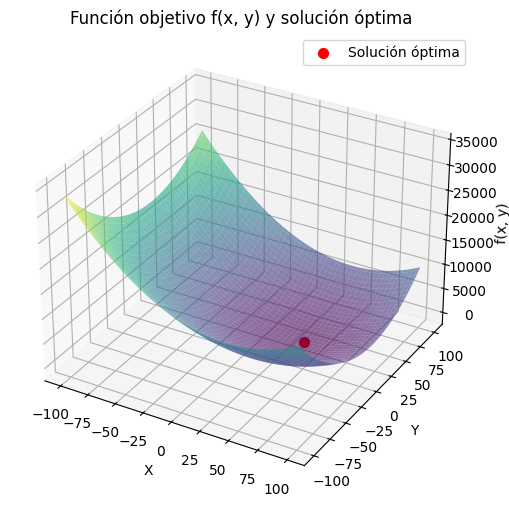

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyswarm import pso

# Simulación de los valores de a y b
a = np.random.uniform(30, 40)
b = np.random.uniform(-20, -10)
print(f"Valores simulados: a = {a:.2f}, b = {b:.2f}")

# Función objetivo
def funcion_objetivo(x):
    return (x[0] - a)**2 + (x[1] + b)**2

# Límites inferiores y superiores
lb = [-100, -100]  # límite inferior
ub = [100, 100]    # límite superior

# Parámetros del PSO
num_particulas = 20
cantidad_iteraciones = 10

# Definir un wrapper para almacenar gbest
def pso_tracking(func, lb, ub, swarmsize, maxiter):
    solucion_optima, valor_optimo = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter, debug=True)
    return solucion_optima, valor_optimo

# Llamada a la función pso y almacenamiento del valor de gbest en cada iteración
solucion_optima, valor_optimo = pso_tracking(funcion_objetivo, lb, ub, swarmsize=num_particulas, maxiter=cantidad_iteraciones)

# Resultados
print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

# Gráfico 3D de la función objetivo
x_vals = np.linspace(lb[0], ub[0], 100)
y_vals = np.linspace(lb[1], ub[1], 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_vals = (x_mesh - a)**2 + (y_mesh + b)**2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_vals, cmap='viridis', alpha=0.6)
ax.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='red', s=50, label='Solución óptima')

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Función objetivo f(x, y) y solución óptima')
ax.legend()

# Mostrar gráfico 3D
plt.show()


Pyswarm no dispone de un método para obtener directamente los valores de gbest, por lo que la solución para poder graficar la evolución de la variable es tomar los prints generados cuando debug=True y generar el array para graficar a partir de los mismos

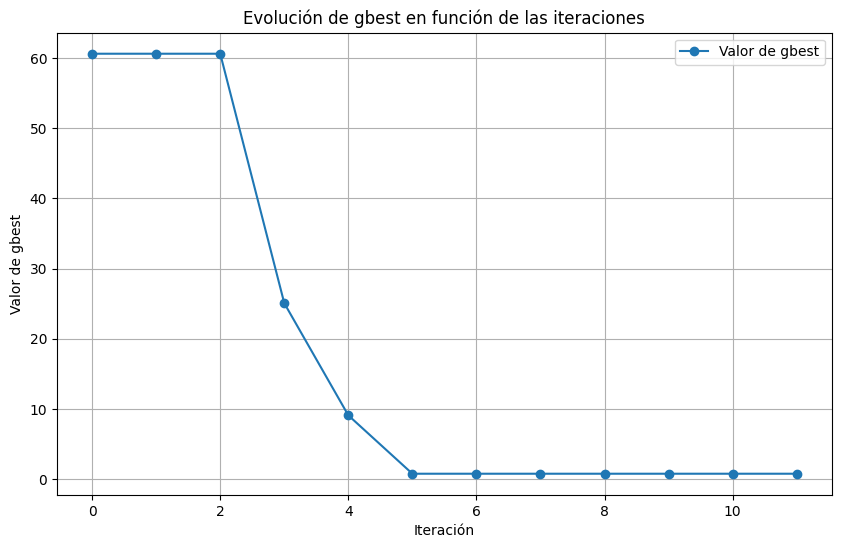

In [9]:
#print de pso:
# Best after iteration 1: [47.07759798 17.62548789] 60.62513986042821
# Best after iteration 2: [47.07759798 17.62548789] 60.62513986042821
# Best after iteration 3: [47.07759798 17.62548789] 60.62513986042821
# New best for swarm at iteration 4: [36.51367314 15.51550632] 25.077761217954297
# Best after iteration 4: [36.51367314 15.51550632] 25.077761217954297
# New best for swarm at iteration 5: [37.17673087 21.41021111] 9.096894353406931
# New best for swarm at iteration 5: [40.23446064 20.04134221] 0.778801788699385
# Best after iteration 5: [40.23446064 20.04134221] 0.778801788699385
# Best after iteration 6: [40.23446064 20.04134221] 0.778801788699385
# Best after iteration 7: [40.23446064 20.04134221] 0.778801788699385
# Best after iteration 8: [40.23446064 20.04134221] 0.778801788699385
# Best after iteration 9: [40.23446064 20.04134221] 0.778801788699385
# Best after iteration 10: [40.23446064 20.04134221] 0.778801788699385
# Stopping search: maximum iterations reached --> 10

historial_gbest = [60.62513986042821
,60.62513986042821
,60.62513986042821
,25.077761217954297
,9.096894353406931
,0.778801788699385
,0.778801788699385
,0.778801788699385
,0.778801788699385
,0.778801788699385
,0.778801788699385
,0.778801788699385]

# Gráfico de evolución de gbest (no disponible directamente en pyswarm)
plt.figure(figsize=(10, 6))
plt.plot(historial_gbest, marker='o', label='Valor de gbest')
plt.title('Evolución de gbest en función de las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Valor de gbest')
plt.legend()
plt.grid(True)
plt.show()

PSO manual: 

Al ejecutar el algoritmo manualmente, la convergencia hacia la solución óptima ocurre de manera más gradual, lo que implica que hay más iteraciones con soluciones subóptimas. Esto puede reflejar una búsqueda más amplia y exploración del espacio de soluciones.
Aunque la calidad de la solución es buena, el algoritmo PSO manual puede no alcanzar el valor óptimo tan rápidamente como pyswarm, dependiendo de los parámetros y las condiciones iniciales.

El ajuste fino de los parámetros (como la inercia, los coeficientes de aceleración, etc.) juega un papel crucial. Si los parámetros no están correctamente ajustados, puede afectar negativamente la velocidad de convergencia y la precisión de la solución.
La implementación manual requiere un control detallado de cada paso, lo que otorga flexibilidad pero aumenta la complejidad.


pyswarm: 

En contraste, pyswarm parece lograr una convergencia más rápida en términos del valor óptimo, ajustando las posiciones globales de las partículas en menos iteraciones, lo que sugiere una estrategia de búsqueda más eficiente.
La biblioteca pyswarm proporciona resultados que son más consistentes y rápidos en términos de alcanzar el mínimo global, posiblemente debido a su implementación más optimizada y refinada.

pyswarm maneja mejor los parámetros por defecto, lo que hace que el algoritmo sea más robusto y menos dependiente de una configuración óptima de hiperparámetros, lo que simplifica su uso en escenarios prácticos.
Al ser una biblioteca preconstruida, pyswarm simplifica enormemente el proceso de implementación y manejo del PSO, lo que la convierte en una herramienta conveniente cuando se buscan soluciones rápidas y eficientes.

## Ejercicio 3

Iteración 1: Mejor posición global [-9.4970172  -1.06020915], Valor 9.413406849352752e-05
Iteración 2: Mejor posición global [-9.4970172  -1.06020915], Valor 9.413406849352752e-05
Iteración 3: Mejor posición global [-9.4970172  -1.06020915], Valor 9.413406849352752e-05
Iteración 4: Mejor posición global [-9.4970172  -1.06020915], Valor 9.413406849352752e-05
Iteración 5: Mejor posición global [-9.4970172  -1.06020915], Valor 9.413406849352752e-05
Iteración 6: Mejor posición global [-2.72920261  4.93345734], Valor 0.03721846242988142
Iteración 7: Mejor posición global [-2.72920261  4.93345734], Valor 0.03721846242988142
Iteración 8: Mejor posición global [-0.85369836  2.91346034], Valor 0.05913155605239894
Iteración 9: Mejor posición global [-2.82868108  3.91319336], Valor 0.06445471883592706
Iteración 10: Mejor posición global [-2.82868108  3.91319336], Valor 0.06445471883592706
Iteración 11: Mejor posición global [-2.67075535  3.90620309], Valor 0.06573431159981087
Iteración 12: Mejor 

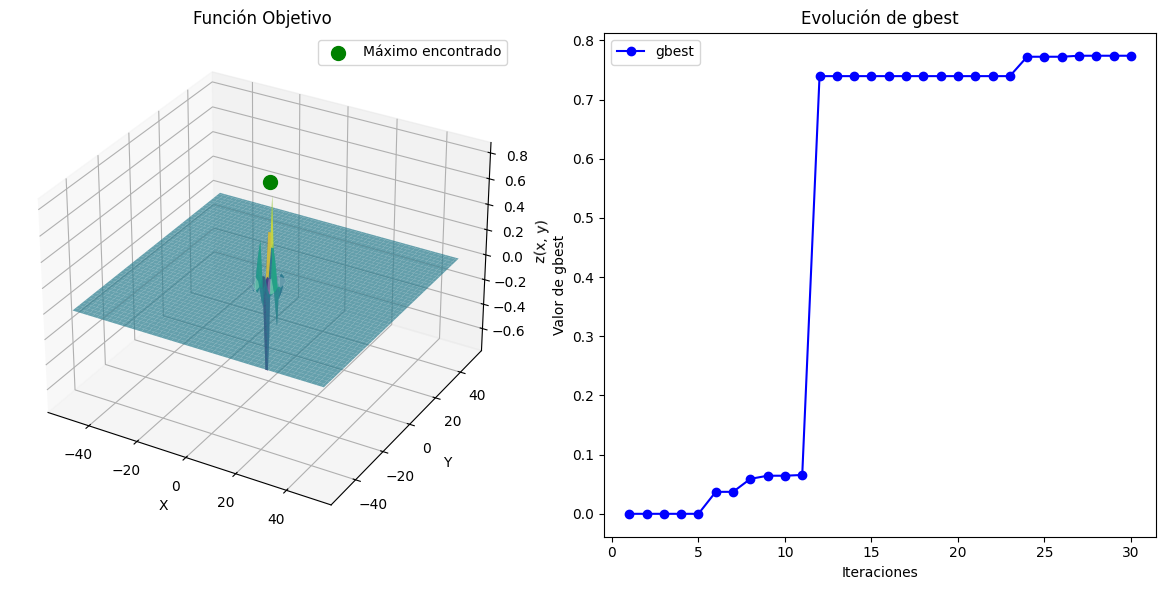

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función objetivo
def funcion_objetivo(x, y):
    return np.exp((-0.1)*(x ** 2 + y ** 2)) * np.cos(x) * np.sin(y)

# Parámetros del PSO
num_particulas = 20  # Número de partículas
dim = 2  # Dimensiones
cantidad_iteraciones = 30  # Máximo número de iteraciones
c1 = 2.0  # Componente cognitivo
c2 = 2.0  # Componente social
w = 0.7  # Factor de inercia
limite_inf = -50  # Límite inferior de búsqueda
limite_sup = 50  # Límite superior de búsqueda

def maximizar_PSO(w):
    # Inicialización de las partículas
    particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # Posiciones iniciales de las partículas
    velocidades = np.zeros((num_particulas, dim))  # Inicialización de la matriz de velocidades

    # Inicialización de pbest y gbest
    pbest = particulas.copy()  # Mejores posiciones personales iniciales
    fitness_pbest = np.array([funcion_objetivo(p[0], p[1]) for p in particulas])  # Mejores fitness personales iniciales

    gbest = pbest[np.argmax(fitness_pbest)]  # Mejor posición global inicial
    fitness_gbest = np.max(fitness_pbest)  # Fitness global inicial

    historial_gbest = []  # Historial del mejor global en cada iteración

    # Búsqueda
    for iteracion in range(cantidad_iteraciones):
        for i in range(num_particulas):  # Iteración sobre cada partícula
            r1, r2 = np.random.rand(), np.random.rand()  # Números aleatorios para los componentes cognitivo y social

            # Actualización de la velocidad de la partícula en cada dimensión
            velocidades[i] = (w * velocidades[i] +
                              c1 * r1 * (pbest[i] - particulas[i]) +
                              c2 * r2 * (gbest - particulas[i]))

            # Actualización de la posición de la partícula
            particulas[i] += velocidades[i]
            particulas[i] = np.clip(particulas[i], limite_inf, limite_sup)  # Mantener las partículas dentro de los límites

            # Evaluación de la nueva posición
            fitness = funcion_objetivo(particulas[i][0], particulas[i][1])

            # Actualización del mejor personal
            if fitness > fitness_pbest[i]:
                fitness_pbest[i] = fitness
                pbest[i] = particulas[i].copy()

            # Actualización del mejor global
            if fitness > fitness_gbest:
                fitness_gbest = fitness
                gbest = particulas[i].copy()

        # Almacenar el mejor valor global en esta iteración
        historial_gbest.append(fitness_gbest)
        print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")

    # Resultado final
    solucion_optima = gbest
    valor_optimo = fitness_gbest

    return solucion_optima, valor_optimo, historial_gbest

solucion_optima, valor_optimo, historial_gbest = maximizar_PSO(w)

print("\nSolución óptima (x, y):", solucion_optima)
print("Valor óptimo:", valor_optimo)

# Graficar la función objetivo y la solución óptima
x_vals = np.linspace(limite_inf, limite_sup, 100)
y_vals = np.linspace(limite_inf, limite_sup, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_objetivo(X, Y)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico 3D de la función objetivo
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax1.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='g', s=100, label="Máximo encontrado")

ax1.set_title("Función Objetivo")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("z(x, y)")
ax1.legend()

# Subplot 2: Gráfico de evolución de gbest
ax2 = fig.add_subplot(122)
ax2.plot(range(1, cantidad_iteraciones + 1), historial_gbest, marker='o', color='b', label="gbest")
ax2.set_title("Evolución de gbest")
ax2.set_xlabel("Iteraciones")
ax2.set_ylabel("Valor de gbest")
ax2.legend()

plt.tight_layout()
plt.show()

Iteración 1: Mejor posición global [ 5.5956497  -4.19441881], Valor 0.005047935543990417
Iteración 2: Mejor posición global [-1.2906684   1.72364816], Valor 0.1718680435765559
Iteración 3: Mejor posición global [-1.11831874  1.09215015], Valor 0.3039381986016427
Iteración 4: Mejor posición global [-0.44804171  0.61201727], Valor 0.48886362059432253
Iteración 5: Mejor posición global [-0.44804171  0.61201727], Valor 0.48886362059432253
Iteración 6: Mejor posición global [-0.19172974  1.00303427], Valor 0.7456942374836563
Iteración 7: Mejor posición global [-0.07868201  1.37713877], Valor 0.8087714981717115
Iteración 8: Mejor posición global [0.00423214 1.3001069 ], Valor 0.8137262480243367
Iteración 9: Mejor posición global [0.01088872 1.31752943], Valor 0.8137676191653408
Iteración 10: Mejor posición global [0.00826417 1.31066008], Valor 0.8137939811230304
Iteración 11: Mejor posición global [-0.00172425  1.31319146], Valor 0.8138308789005131
Iteración 12: Mejor posición global [-1.119

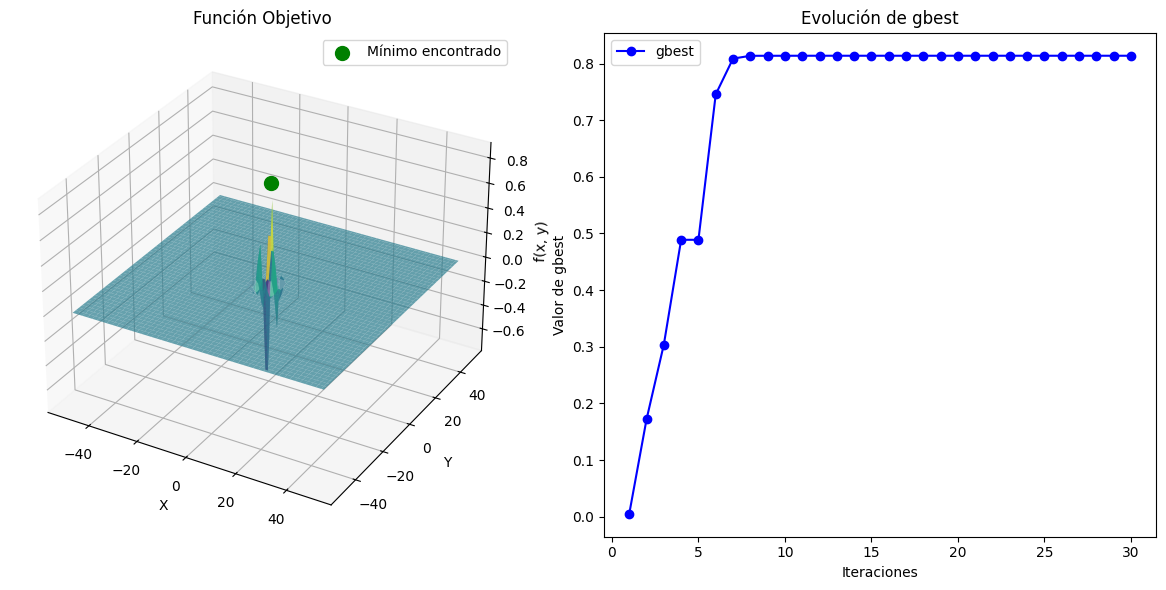

In [43]:
w2 = 0
solucion_optima, valor_optimo, historial_gbest = maximizar_PSO(w2)

# Crear la figura 3D
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico 3D de la función objetivo
ax1 = fig.add_subplot(121, projection='3d')

# Graficar la superficie
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Agregar el punto mínimo encontrado
ax1.scatter(solucion_optima[0], solucion_optima[1], valor_optimo, color='g', s=100, label="Mínimo encontrado")

# Etiquetas y título
ax1.set_title("Función Objetivo")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(x, y)")
ax1.legend()

# Subplot 2: Gráfico de línea de gbest en función de las iteraciones
ax2 = fig.add_subplot(122)

# Graficar la evolución de gbest
ax2.plot(range(1, cantidad_iteraciones + 1), historial_gbest, marker='o', color='b', label="gbest")

# Etiquetas y título
ax2.set_title("Evolución de gbest")
ax2.set_xlabel("Iteraciones")
ax2.set_ylabel("Valor de gbest")
ax2.legend()

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()

Las conclusiones para w = 0 en esta función son similares a las obtenidas en el punto anterior

Iteración 1: Mejor posición global [ 1.9058305  -2.50432138], Valor 0.07266691783275005
Iteración 2: Mejor posición global [0.98805807 0.49995321], Valor 0.2333670299905864
Iteración 3: Mejor posición global [0.98805807 0.49995321], Valor 0.2333670299905864
Iteración 4: Mejor posición global [0.85314322 0.94158913], Valor 0.4524145668393547
Iteración 5: Mejor posición global [0.85314322 0.94158913], Valor 0.4524145668393547
Iteración 6: Mejor posición global [0.5034798  2.08619196], Valor 0.4808443378634764
Iteración 7: Mejor posición global [0.60022963 1.76948703], Valor 0.5705647835510108
Iteración 8: Mejor posición global [0.67762949 1.51612309], Valor 0.5904075401388583
Iteración 9: Mejor posición global [0.67762949 1.51612309], Valor 0.5904075401388583
Iteración 10: Mejor posición global [0.45305568 0.9301381 ], Valor 0.6476498953757748
Iteración 11: Mejor posición global [0.33817189 0.94857306], Valor 0.6926332113609468
Iteración 12: Mejor posición global [0.19791292 1.15320588],

C:\Users\Windows\AppData\Local\Temp\ipykernel_20016\1643201905.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados_gbest, labels=[f'w = {w}' for w in w_values])


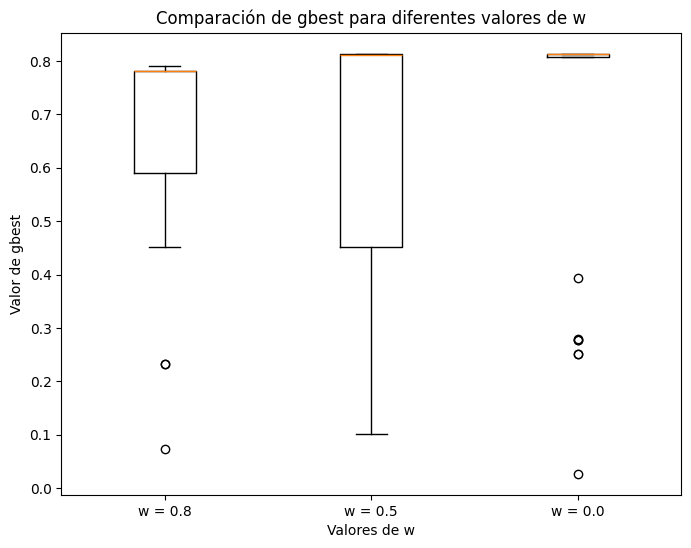

In [40]:
w_values = [0.8, 0.5, 0.0]
resultados_gbest = []

for w in w_values:
    _, _, historial_gbest = maximizar_PSO(w)
    resultados_gbest.append(historial_gbest)

# Graficar los boxplots
plt.figure(figsize=(8, 6))
plt.boxplot(resultados_gbest, labels=[f'w = {w}' for w in w_values])

# Etiquetas y título
plt.title('Comparación de gbest para diferentes valores de w')
plt.xlabel('Valores de w')
plt.ylabel('Valor de gbest')
plt.show()

1. Boxplot para w = 0.8:
El rango intercuartil (IQR) es relativamente estrecho, lo que indica que la mayoría de los valores de gbest están concentrados en un intervalo más pequeño alrededor del valor más alto. Esto sugiere que el factor de inercia de w = 0.8 lleva a que las partículas del PSO converjan de manera más rápida hacia un valor alto.
El valor máximo es muy cercano a 0.8, lo que indica que el algoritmo encontró soluciones cercanas al óptimo de manera consistente.
Hay algunos outliers (puntos fuera de la caja) que representan iteraciones donde el algoritmo no alcanzó valores altos de gbest, pero estos son pocos, lo que indica un buen rendimiento general.
Parece ser el valor más efectivo, ya que la mayoría de las iteraciones se concentran cerca del valor máximo, con pocas excepciones.

2. Boxplot para w = 0.5:
Este boxplot muestra una mayor dispersión en los valores de gbest. La caja (IQR) es más ancha que la de w = 0.8, lo que indica que el rendimiento del PSO es más variable con este valor de w.
Aunque el valor máximo sigue siendo alto, cerca de 0.8, el rango de los valores de gbest es mayor, lo que sugiere que las partículas tardaron más en converger o tuvieron más variabilidad en el proceso.
Hay un rango mayor de valores bajos y varios outliers en la parte inferior. Esto indica que en varias iteraciones, el algoritmo no encontró buenos valores de gbest, probablemente debido a una menor estabilidad en el proceso de optimización con w = 0.5.

3. Boxplot para w = 0.0:
Cuando el factor de inercia w = 0.0, significa que las partículas no mantienen ninguna "memoria" de su velocidad anterior, lo que genera un comportamiento errático. Esto se refleja en el gráfico, donde casi todos los valores de gbest están cerca de 0.8, pero con varios outliers muy bajos.
El número de outliers es mucho mayor y se distribuyen en un rango muy amplio, lo que indica que, aunque el algoritmo alcanzó buenos valores de gbest en algunas iteraciones, tuvo mucha variabilidad. Esto refleja que el proceso de optimización es más caótico cuando no hay un factor de inercia que mantenga el movimiento de las partículas de manera consistente.

## Ejercicio 4

In [63]:
from pyswarm import pso

# Definir la función objetivo que queremos minimizar
def objetivo(variables):
    x1, x2 = variables
    eq1 = 3*x1 + 2*x2 - 9   # Igualamos a 0
    eq2 = x1 - 5*x2 - 4     # Igualamos a 0
    
    # Error total (suma de los cuadrados de los errores de ambas ecuaciones)
    error_total = eq1**2 + eq2**2
    return error_total

# Parámetros de PSO
c1 = 2.0      # Coeficiente cognitivo
c2 = 2.0      # Coeficiente social
w = 0.5       # Peso de inercia
num_particulas = 30
max_iter = 50

# Límite para las variables x e y
limites_inferiores = [-9, -9]  # Límite inferior para x1 e x2
limites_superiores = [9, 9]    # Límite superior para x1 e x2

# Ejecutar el algoritmo PSO de pyswarm
solucion_optima, valor_optimo = pso(objetivo, limites_inferiores, limites_superiores, 
                                    swarmsize=num_particulas, maxiter=max_iter, 
                                    omega=w, phip=c1, phig=c2)

# Mostrar la solución
print(f"Solución óptima: x1 = {solucion_optima[0]}, x2 = {solucion_optima[1]}")
print(f"Valor óptimo de la función objetivo: {valor_optimo}")


Stopping search: Swarm best objective change less than 1e-08
Solución óptima: x1 = 3.1175017434712244, x2 = -0.1764456408698891
Valor óptimo de la función objetivo: 2.219638059483477e-07


La ecuación se resolvió en papel mediante el método de sustitución y se pudo obtener los valores correspondientes a x1 y x2, siendo estos 53/17 y -3/17 respectivamente. Para definir los límites se consideró que en la primera ecuación ambos números suman 9, por lo que una buena posibilidad es que la suma era de dos números menores que 9.

Para evaluar si el método permite resolver sistemas de ecuaciones no lineales, se intentará resolver el sistema planteado en este video de YouTube: https://youtu.be/qUoCNovQLqQ?si=CyQizyVJVUnK11kX

In [57]:
from pyswarm import pso

# Definir la función objetivo que queremos minimizar
def objetivo(variables):
    x1, x2 = variables
    eq1 = x1**2 - x2**2 - 24   # Igualamos a 0
    eq2 = x1*x2 - 35     # Igualamos a 0
    
    # Error total (suma de los cuadrados de los errores de ambas ecuaciones)
    error_total = eq1**2 + eq2**2
    return error_total

# Parámetros de PSO
c1 = 2.0      # Coeficiente cognitivo
c2 = 2.0      # Coeficiente social
w = 0.7       # Peso de inercia
num_particulas = 30
max_iter = 30

# Límite para las variables x e y
limites_inferiores = [-9, -9]  # Límite inferior para x1 e x2
limites_superiores = [9, 9]    # Límite superior para x1 e x2

# Ejecutar el algoritmo PSO de pyswarm
solucion_optima, valor_optimo = pso(objetivo, limites_inferiores, limites_superiores, 
                                    swarmsize=num_particulas, maxiter=max_iter, 
                                    omega=w, phip=c1, phig=c2)

# Mostrar la solución
print(f"Solución óptima: x = {solucion_optima[0]}, y = {solucion_optima[1]}")
print(f"Valor óptimo de la función objetivo: {valor_optimo}")

Stopping search: maximum iterations reached --> 50
Solución óptima: x = 7.00166452918174, y = 5.003235021607806
Valor óptimo de la función objetivo: 0.0010413220110170173


Las soluciones para el sistema son (7,5) o (-7,-5). El algoritmo logra obtener ambas soluciones para x e y al ejecutarlo varias veces, pero sólo puede obtener un par a la vez

El ejercicio se resuelve despejando las funciones y buscando los valores de x1 y x2 que la igualan a 0

Los resultados se vuelven más o menos precisos en función de los parámetros elegidos. Para w = 0,5 se consiguieron las mejores soluciones en las distintas iteraciones